## Guide for RFM Analysis in python

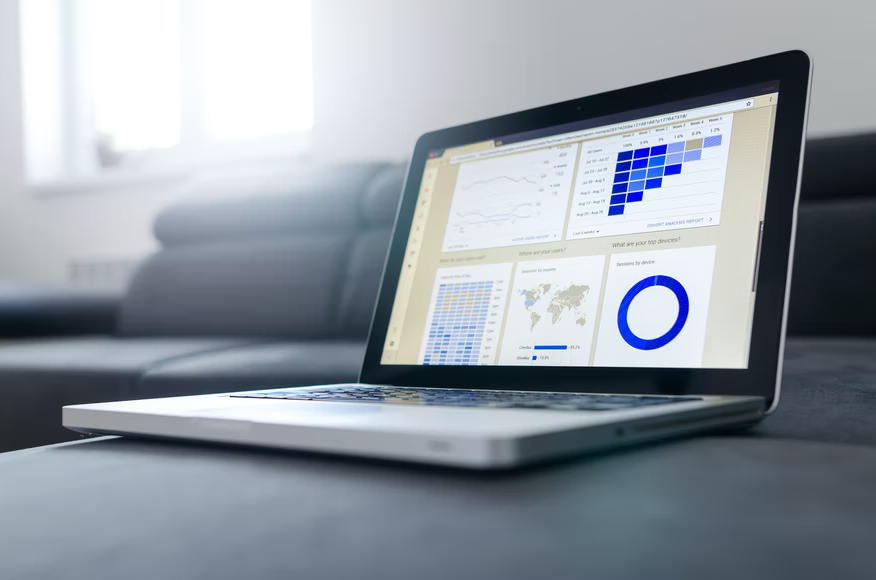

**RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.**

## Import the libraries

In [104]:
import time, warnings
import datetime as dt

#visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

## Get the Data

In [94]:
pip install patool
import patoolib
patoolib.extract_archive("C:/Users/faiza kauser/Downloads/Year 2009-2010.csv.zip", outdir = "/Downloads/")

Note: you may need to restart the kernel to use updated packages.


In [106]:
df = pd.read_csv('/Downloads/Year 2009-2010.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


## Data Preparation

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [108]:
df.shape

(525461, 8)

In [109]:
df.Country.value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

**As customer clusters may vary geographically, I have restricted the data for only country 'Germany', which has third largest of our customers historical data.**

In [110]:
retail_ger = df[df['Country']=='Germany']

In [111]:
#check the shape
retail_ger.shape

(8129, 8)

In [112]:
df1 = df.groupby('Country')['Quantity'].value_counts()

In [113]:
df1.Germany

Quantity
12     2093
6      1252
24      722
8       572
10      479
       ... 
300       1
384       1
432       1
480       1
600       1
Name: Quantity, Length: 70, dtype: int64

In [114]:
retail_ger['Quantity'].value_counts()

 12     2093
 6      1252
 24      722
 8       572
 10      479
        ... 
 21        1
-16        1
 432       1
-36        1
 180       1
Name: Quantity, Length: 70, dtype: int64

In [115]:
#remove canceled orders
retail_ger = retail_ger[retail_ger['Quantity']>0]
retail_ger.shape

(7661, 8)

In [116]:
retail_ger['Customer ID'].isnull().any()

False

**#There are no rows where customer ID is NA**

In [24]:
retail_ger['InvoiceDate'].value_counts()

7/2/2010 11:44      135
1/22/2010 14:17     110
3/26/2010 14:01     105
1/31/2010 15:45      99
6/15/2010 12:14      94
                   ... 
2/23/2010 11:44       1
4/12/2010 10:10       1
10/27/2010 12:01      1
11/15/2010 13:24      1
2/4/2010 15:20        1
Name: InvoiceDate, Length: 346, dtype: int64

In [117]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", retail_ger['Invoice'].nunique())
print("Number of products bought: ",retail_ger['StockCode'].nunique())
print("Number of customers:", retail_ger['Customer ID'].nunique() )

Summary..
Number of transactions:  347
Number of products bought:  1457
Number of customers: 67


## RFM Analysis

**RFM analysis scores customers on each of the three main factors. Generally, a score from 1 to 5 is given, with 5 being the highest. Various implementations of an RFM analysis system may use slightly different values or scaling, however.**

### Recency

**Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again.Here we are calculating recency for customers.**

In [124]:
#last date available in our dataset
retail_ger['InvoiceDate'].max()

'9/9/2010 18:14'

### The last date we have is 2010-12-09 so we will use it as reference.

In [123]:
now = dt.date(2010,12,9)
print(now)

2010-12-09


In [125]:
#create a new column called date which contains the date of invoice only
retail_ger['date'] = pd.DatetimeIndex(retail_ger['InvoiceDate']).date

In [126]:
retail_ger.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,12/1/2009 11:50,1.25,12533.0,Germany,2009-12-01
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,12/1/2009 11:50,0.55,12533.0,Germany,2009-12-01
581,489526,21498,RED SPOTS WRAP,25,12/1/2009 11:50,0.42,12533.0,Germany,2009-12-01
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,12/1/2009 11:50,1.65,12533.0,Germany,2009-12-01
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,12/1/2009 11:50,1.25,12533.0,Germany,2009-12-01


In [127]:
#group by customers and check last date of purchase
recency_df = retail_ger.groupby(by='Customer ID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12426.0,2010-02-15
1,12427.0,2010-12-03
2,12468.0,2010-07-01
3,12471.0,2010-11-30
4,12472.0,2010-12-05


In [128]:
recent_date = recency_df['LastPurchaseDate'].max()
recent_date

datetime.date(2010, 12, 9)

In [129]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12426.0,2010-02-15,297
1,12427.0,2010-12-03,6
2,12468.0,2010-07-01,161
3,12471.0,2010-11-30,9
4,12472.0,2010-12-05,4


### Frequency

**Customers who purchased once are often are more likely to purchase again.We calculate the frequency of transactions of the customer from the company.**

In [131]:
retail_ger_copy = retail_ger
retail_ger_copy.drop_duplicates(subset=['Invoice', 'Customer ID'], keep="first", inplace=True)
frequency_df= retail_ger_copy.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12426.0,1
1,12427.0,1
2,12468.0,3
3,12471.0,49
4,12472.0,13


### Monetary

**The amount of money customer spend in a given period.Here we are calculating the monetary value of customer spend on the products from the company.**

**To do that, first, we will create a new column total to have the Total Price per invoice.**

In [132]:
#create column total cost
retail_ger['Total'] = retail_ger['Quantity'] * retail_ger['Price']
monetary_df = retail_ger.groupby(by='Customer ID',as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12426.0,10.20
1,12427.0,12.60
2,12468.0,43.60
3,12471.0,1629.70
4,12472.0,289.94


### Merging all three columns in one dataframe

**Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency and monetary value.**

In [134]:
#merge recency dataframe with frequency dataframe
rf_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head(20)

,CustomerID,Recency,Frequency,Monetary
0,12426.0,297,1,10.20
1,12427.0,6,1,12.60
2,12468.0,161,3,43.60
3,12471.0,9,49,1629.70
4,12472.0,4,13,289.94
5,12474.0,13,13,301.99
6,12475.0,44,1,17.40
7,12476.0,31,12,980.21
8,12477.0,34,3,65.38
9,12480.0,34,3,54.00


## Ranking Customer’s based upon their recency, frequency, and monetary score

In [135]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12426.0,297,1,10.20,3.030303,15.671642,15.671642
1,12427.0,6,1,12.60,88.636364,15.671642,15.671642
2,12468.0,161,3,43.60,24.242424,53.731343,53.731343
3,12471.0,9,49,1629.70,82.575758,100.000000,100.000000
4,12472.0,4,13,289.94,91.666667,93.283582,93.283582


**RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score**

In [136]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12426.0,0.69
1,12427.0,1.33
2,12468.0,2.47
3,12471.0,4.87
4,12472.0,4.65
5,12474.0,4.55
6,12475.0,1.06


## Rating Customer based upon the RFM score

**rfm score >4.5 : Top Customer**

**4.5 > rfm score > 4 : High Value Customer**

**4>rfm score >3 : Medium value customer**

**3>rfm score>1.6 : Low-value customer**

**rfm score<1.6 :Lost Customer**

In [137]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)


,CustomerID,RFM_Score,Customer_segment
0,12426.0,0.69,Lost Customers
1,12427.0,1.33,Lost Customers
2,12468.0,2.47,Low Value Customers
3,12471.0,4.87,Top Customers
4,12472.0,4.65,Top Customers
5,12474.0,4.55,Top Customers
6,12475.0,1.06,Lost Customers
7,12476.0,4.33,High value Customer
8,12477.0,2.76,Low Value Customers
9,12480.0,2.76,Low Value Customers


In [138]:
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].sort_values('RFM_Score', ascending=False).head(20)

,CustomerID,RFM_Score,Customer_segment
41,12647.0,4.90,Top Customers
3,12471.0,4.87,Top Customers
58,12709.0,4.85,Top Customers
33,12621.0,4.81,Top Customers
4,12472.0,4.65,Top Customers
5,12474.0,4.55,Top Customers
27,12600.0,4.50,High value Customer
60,12712.0,4.46,High value Customer
45,12662.0,4.35,High value Customer
7,12476.0,4.33,High value Customer


## Visualizing the customer segments

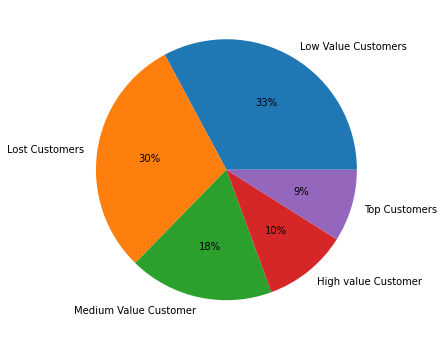

In [140]:
#Here we will use a pie plot to display all segments of customers.
plt.figure(figsize = (6,6))
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

### Now that we know our customer segments we can do target marketing.

**Top Customers are Champions: Regular Reward Point to them. They can be early adopters to new products.Suggest them "Refer a friend".**

**Low Value Customers: Send them personalized emails to encourage them to shop.**